<a href="https://colab.research.google.com/github/mohamedb93/Predictive_Analysis_Data_2024/blob/main/Decision_trees_and_random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

In [ ]:
# !pip install pydot
#!pip install pydot-ng
#!pip install graphviz
!pip install --upgrade scikit-learn==0.23.3

ERROR: Could not find a version that satisfies the requirement scikit-learn==0.23.3 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1)
ERROR: No matching distribution found for scikit-learn==0.23.3


#Task 2b: Import the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Task 3: Load the Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/kyphosis.csv')


#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


##Get Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


##Find Missing Values

In [ ]:
df.isnull()

,Kyphosis,Age,Number,Start
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False


#Task 5: Perform Data Cleaning

#Task 6: Visualize Cleaned up Dataset

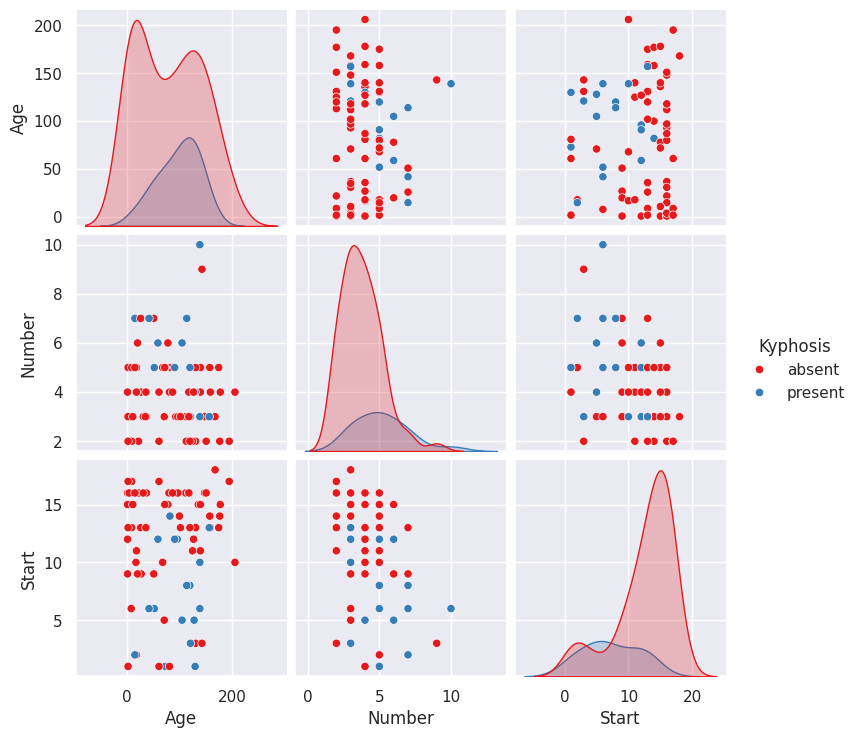

In [ ]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Task 9: Choose the ML Method to follow

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Task 10: Train the ML Model

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#Task 11: Test the Model

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.84      0.84        19
     present       0.50      0.50      0.50         6

    accuracy                           0.76        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.76      0.76      0.76        25



#Tree Visualistaion

In [ ]:
from IPython.display import Image
# from sklearn.externals.six import StringIO
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

In [ ]:
df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

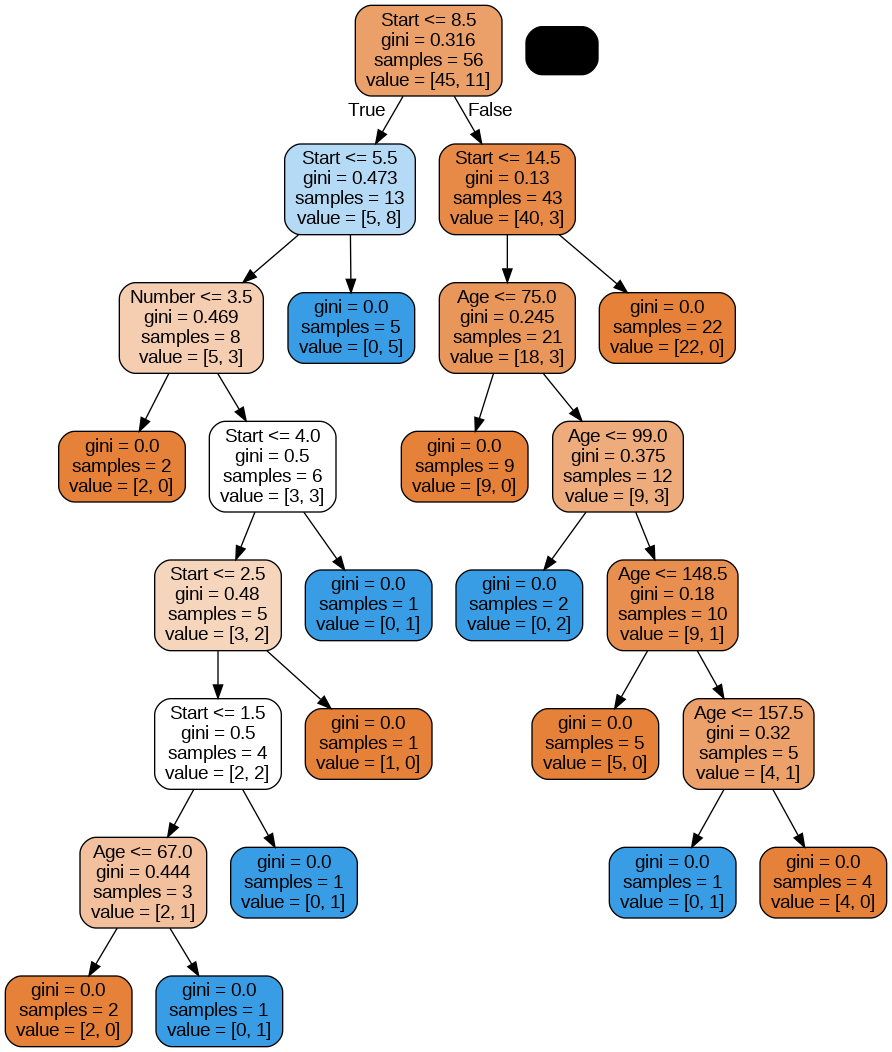

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25

